In [ ]:
import torch

model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet50', pretrained=True)

model.eval()

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
Downloading: "https://download.pytorch.org/models/deeplabv3_resnet50_coco-cd0a2569.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet50_coco-cd0a2569.pth
100%|██████████| 161M/161M [00:03<00:00, 42.6MB/s]


DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [ ]:
!pip install torchinfo

from torchinfo import summary

summary(model, input_size=(32, 3, 256, 256))

Layer (type:depth-idx)                             Output Shape              Param #
DeepLabV3                                          [32, 21, 256, 256]        --
├─IntermediateLayerGetter: 1-1                     [32, 2048, 32, 32]        --
│    └─Conv2d: 2-1                                 [32, 64, 128, 128]        9,408
│    └─BatchNorm2d: 2-2                            [32, 64, 128, 128]        128
│    └─ReLU: 2-3                                   [32, 64, 128, 128]        --
│    └─MaxPool2d: 2-4                              [32, 64, 64, 64]          --
│    └─Sequential: 2-5                             [32, 256, 64, 64]         --
│    │    └─Bottleneck: 3-1                        [32, 256, 64, 64]         75,008
│    │    └─Bottleneck: 3-2                        [32, 256, 64, 64]         70,400
│    │    └─Bottleneck: 3-3                        [32, 256, 64, 64]         70,400
│    └─Sequential: 2-6                             [32, 512, 32, 32]         --
│    │    └─Bottlen

In [ ]:
filename = "photography-01-800x400.png"

In [ ]:
from PIL import Image
from torchvision import transforms

input_image = Image.open(filename)
input_image = input_image.convert("RGB")

preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(input_image)
print(input_tensor.size())

input_batch = input_tensor.unsqueeze(0)
print(input_batch.size())

torch.Size([3, 400, 800])
torch.Size([1, 3, 400, 800])


In [ ]:
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)['out'][0]
output_predictions = output.argmax(0)

print(output_predictions.size())

torch.Size([400, 800])


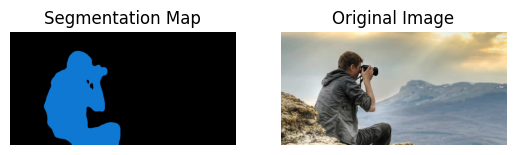

In [ ]:
palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")

r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(input_image.size)
r.putpalette(colors)

import matplotlib.pyplot as plt
import cv2
plt.subplot(121)
plt.imshow(r)
plt.title("Segmentation Map")
plt.axis("off")

plt.subplot(122)
plt.imshow(cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.show()

In [ ]:
from PIL import Image
from torchvision import transforms

filename = "traffic_jam_1050x700.jpg"

input_image = Image.open(filename)
input_image = input_image.convert("RGB")

input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)

In [ ]:
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)['out'][0]
output_predictions = output.argmax(0)

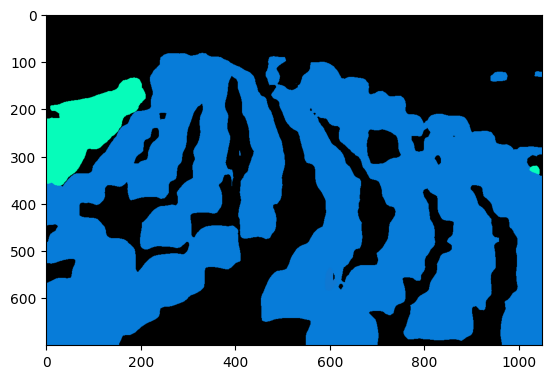

In [ ]:
r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(input_image.size)
r.putpalette(colors)

plt.imshow(r)
plt.show()